## README

## SETUP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## FUNCTIONS AND CONSTANTS

## DATA INGESTION

In [3]:
df = pd.read_csv(r'case-files/test_dataset(in).csv')
df.head()

,user_id,session_id,timestamp,date,hour,day_of_week,is_weekend,is_holiday,game_type,sport_type,...,net_result,session_length_minutes,games_played,bonus_used,deposit_amount,withdrawal_amount,previous_session_gap_hours,lifetime_deposits,lifetime_bets,avg_bet_size
0,user_001948,sess_00000068,2023-07-29T23:55:21.913140Z,7/29/2023,23,5,1,0,roulette,NaN,...,106.43,59,19,0,NaN,NaN,NaN,0.0,19,65.28
1,user_001628,sess_00000730,2023-08-01T01:46:56.989818Z,8/1/2023,1,1,0,0,live_dealer,NaN,...,-14.04,57,19,0,NaN,NaN,NaN,0.0,19,14.04
2,user_001559,sess_00000311,2023-08-01T14:30:03.483604Z,8/1/2023,14,1,0,0,roulette,NaN,...,7.27,113,37,0,NaN,NaN,NaN,0.0,37,14.63
3,user_000376,sess_00001978,2023-08-03T04:32:38.914782Z,8/3/2023,4,3,0,0,poker,NaN,...,17.46,63,21,0,NaN,NaN,NaN,0.0,21,13.15
4,user_000371,sess_00002519,2023-08-04T09:02:22.508701Z,8/4/2023,9,4,0,0,casino_slots,NaN,...,-115.25,38,12,1,NaN,NaN,NaN,0.0,12,115.25


## EDA

In [18]:
df.groupby('user_id').agg(
    session_count=('session_id', 'nunique')
).reset_index().sort_values('session_count', ascending=False)

,user_id,session_count
283,user_000383,19
894,user_001255,17
359,user_000493,16
1406,user_001948,16
253,user_000341,16
...,...,...
1121,user_001562,1
1085,user_001514,1
656,user_000940,1
549,user_000773,1


In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

user_id                                    object
session_id                                 object
timestamp                     datetime64[ns, UTC]
date                                       object
hour                                        int64
day_of_week                                 int64
is_weekend                                  int64
is_holiday                                  int64
game_type                                  object
sport_type                                 object
country                                    object
device_type                                object
payment_method                             object
user_age                                  float64
account_age_days                            int64
vip_tier                                   object
campaign_type                              object
bet_amount                                float64
win_amount                                float64
net_result                                float64


In [30]:
# Calculate number of hours between sessions
df.sort_values(['user_id', 'timestamp'], inplace=True)
df['previous_session_gap_hours'] = df.groupby('user_id')['timestamp'].diff().dt.total_seconds() / 3600

In [34]:
df.shape

(10000, 29)

In [31]:
df[df['user_id'] == 'user_000383'].sort_values('timestamp')

,user_id,session_id,timestamp,date,hour,day_of_week,is_weekend,is_holiday,game_type,sport_type,...,net_result,session_length_minutes,games_played,bonus_used,deposit_amount,withdrawal_amount,previous_session_gap_hours,lifetime_deposits,lifetime_bets,avg_bet_size
2202,user_000383,sess_00000154,2024-01-22 17:41:31.757755+00:00,1/22/2024,17,0,0,0,sports_betting,tennis,...,67.22,42,14,0,97.30,NaN,NaN,97.30,14,37.31
2432,user_000383,sess_00001071,2024-02-03 17:04:24.860062+00:00,2/3/2024,17,5,1,0,poker,NaN,...,-12.55,59,19,1,198.85,NaN,287.381417,296.15,33,24.93
2472,user_000383,sess_00001289,2024-02-06 00:45:43.077258+00:00,2/6/2024,0,1,0,1,sports_betting,hockey,...,-18.17,36,12,0,NaN,NaN,55.688394,296.15,45,22.68
2511,user_000383,sess_00001950,2024-02-07 21:42:26.387636+00:00,2/7/2024,21,2,0,0,sports_betting,NaN,...,22.87,47,15,0,NaN,NaN,44.945364,296.15,60,22.74
2578,user_000383,sess_00002322,2024-02-11 13:30:43.933269+00:00,2/11/2024,13,6,1,0,live_dealer,NaN,...,-79.92,10,3,0,NaN,NaN,87.804874,296.15,63,34.18
2920,user_000383,sess_00002803,2024-02-29 18:58:04.991315+00:00,2/29/2024,18,3,0,0,live_dealer,NaN,...,13.55,153,51,0,NaN,NaN,437.455849,296.15,114,31.64
3033,user_000383,sess_00003074,2024-03-06 22:11:40.087320+00:00,3/6/2024,22,2,0,0,roulette,NaN,...,86.94,215,71,1,164.18,628.71,147.226416,460.33,185,NaN
3195,user_000383,sess_00003813,2024-03-14 22:34:18.835490+00:00,3/14/2024,22,3,0,1,roulette,NaN,...,226.90,42,14,0,NaN,NaN,192.377430,460.33,199,48.06
3251,user_000383,sess_00003909,2024-03-17 18:28:01.392869+00:00,3/17/2024,18,6,1,0,poker,NaN,...,50.32,121,40,1,142.28,NaN,67.895155,602.61,239,63.38
3569,user_000383,sess_00004675,2024-04-03 19:09:11.500651+00:00,4/3/2024,19,2,0,0,casino_slots,NaN,...,-155.51,33,11,0,NaN,NaN,408.686141,602.61,250,72.59


In [33]:
24*60

1440

<Axes: xlabel='previous_session_gap_hours', ylabel='Count'>

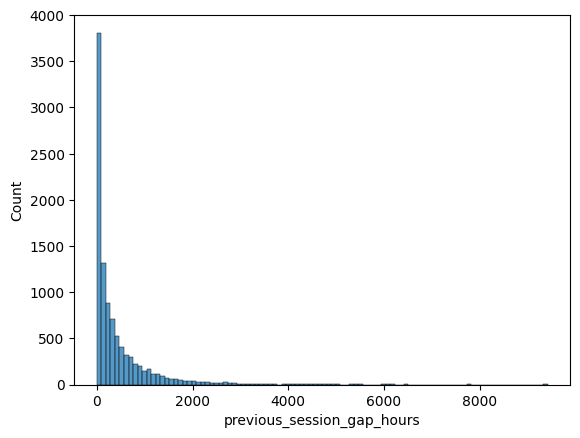

In [32]:
sns.histplot(df['previous_session_gap_hours'].fillna(0), bins=100)

In [23]:
df_aux = df.copy()
df_aux['previous_session_gap_hours'] = df_aux['previous_session_gap_hours'].fillna(0)
df_aux.groupby('previous_session_gap_hours').count()

,user_id,session_id,timestamp,date,hour,day_of_week,is_weekend,is_holiday,game_type,sport_type,...,win_amount,net_result,session_length_minutes,games_played,bonus_used,deposit_amount,withdrawal_amount,lifetime_deposits,lifetime_bets,avg_bet_size
previous_session_gap_hours,,,,,,,,,,,,,,,,,,,,,
-10.0,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,0,2,2,1
-9.0,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,0,0,1,1,1
-8.0,4,4,4,4,4,4,4,4,4,1,...,4,4,4,4,4,0,0,4,4,4
-7.0,6,6,6,6,6,6,6,6,6,0,...,6,6,6,6,6,2,0,6,6,6
-6.0,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,2,0,5,5,4
-5.0,4,4,4,4,4,4,4,4,4,2,...,4,4,4,4,4,3,1,4,4,4
-4.0,7,7,7,7,7,7,7,7,7,2,...,7,7,7,7,7,3,1,7,7,6
-3.0,5,5,5,5,5,5,5,5,5,2,...,5,5,5,5,5,2,1,5,5,5
-2.0,10,10,10,10,10,10,10,10,10,2,...,10,10,10,10,10,4,2,10,10,10


## FEATURE ENGINEERING

## MODEL TRAINING

### BASELINE

### PREDICTOR